In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np

In [5]:
train_df = pd.read_excel("/content/drive/MyDrive/Train/training_label.xlsx")
train_df

,image,class,extent_of_damage,subset
0,image/0.jpeg,"dent,head_lamp",3,Training
1,image/1.jpeg,head_lamp,1,Training
2,image/2.jpeg,scratch,1,Training
3,image/3.jpeg,head_lamp,1,Training
4,image/4.jpeg,unknown,0,Training
...,...,...,...,...
796,image/796.jpeg,unknown,0,Training
797,image/797.jpeg,head_lamp,1,Training
798,image/798.jpeg,unknown,0,Training
799,image/799.jpeg,dent,1,Training


In [6]:
train_df["class_list"]= train_df["class"].str.split(",", n = 5, expand = False)
train_df["id"]=train_df.index
train_df

,image,class,extent_of_damage,subset,class_list,id
0,image/0.jpeg,"dent,head_lamp",3,Training,"[dent, head_lamp]",0
1,image/1.jpeg,head_lamp,1,Training,[head_lamp],1
2,image/2.jpeg,scratch,1,Training,[scratch],2
3,image/3.jpeg,head_lamp,1,Training,[head_lamp],3
4,image/4.jpeg,unknown,0,Training,[unknown],4
...,...,...,...,...,...,...
796,image/796.jpeg,unknown,0,Training,[unknown],796
797,image/797.jpeg,head_lamp,1,Training,[head_lamp],797
798,image/798.jpeg,unknown,0,Training,[unknown],798
799,image/799.jpeg,dent,1,Training,[dent],799


In [7]:
train_df['class_list'] = train_df['class'].apply(lambda x: x.split(','))
train_df.head()

,image,class,extent_of_damage,subset,class_list,id
0,image/0.jpeg,"dent,head_lamp",3,Training,"[dent, head_lamp]",0
1,image/1.jpeg,head_lamp,1,Training,[head_lamp],1
2,image/2.jpeg,scratch,1,Training,[scratch],2
3,image/3.jpeg,head_lamp,1,Training,[head_lamp],3
4,image/4.jpeg,unknown,0,Training,[unknown],4


In [8]:
class_list = ['head_lamp', 'tail_lamp', 'glass_shatter', 'scratch', 'dent', 'unknown']

for elem in class_list:
    train_df[elem] = train_df['class_list'].apply(lambda x: 1 if elem in x else 0)
    
train_df["id"] = train_df["id"].astype(str)+".jpeg"
train_df.head(10)

,image,class,extent_of_damage,subset,class_list,id,head_lamp,tail_lamp,glass_shatter,scratch,dent,unknown
0,image/0.jpeg,"dent,head_lamp",3,Training,"[dent, head_lamp]",0.jpeg,1,0,0,0,1,0
1,image/1.jpeg,head_lamp,1,Training,[head_lamp],1.jpeg,1,0,0,0,0,0
2,image/2.jpeg,scratch,1,Training,[scratch],2.jpeg,0,0,0,1,0,0
3,image/3.jpeg,head_lamp,1,Training,[head_lamp],3.jpeg,1,0,0,0,0,0
4,image/4.jpeg,unknown,0,Training,[unknown],4.jpeg,0,0,0,0,0,1
5,image/5.jpeg,"dent,head_lamp",3,Training,"[dent, head_lamp]",5.jpeg,1,0,0,0,1,0
6,image/6.jpeg,glass_shatter,3,Training,[glass_shatter],6.jpeg,0,0,1,0,0,0
7,image/7.jpeg,"dent,head_lamp",2,Training,"[dent, head_lamp]",7.jpeg,1,0,0,0,1,0
8,image/8.jpeg,tail_lamp,1,Training,[tail_lamp],8.jpeg,0,1,0,0,0,0
9,image/9.jpeg,dent,1,Training,[dent],9.jpeg,0,0,0,0,1,0


In [9]:
new_train = train_df.drop(["class","image","subset","class_list"],axis=1)
new_train.head(10)

,extent_of_damage,id,head_lamp,tail_lamp,glass_shatter,scratch,dent,unknown
0,3,0.jpeg,1,0,0,0,1,0
1,1,1.jpeg,1,0,0,0,0,0
2,1,2.jpeg,0,0,0,1,0,0
3,1,3.jpeg,1,0,0,0,0,0
4,0,4.jpeg,0,0,0,0,0,1
5,3,5.jpeg,1,0,0,0,1,0
6,3,6.jpeg,0,0,1,0,0,0
7,2,7.jpeg,1,0,0,0,1,0
8,1,8.jpeg,0,1,0,0,0,0
9,1,9.jpeg,0,0,0,0,1,0


In [10]:
X = train_df.loc[:, 'image'].values.tolist()
y_hl = train_df.loc[:, 'head_lamp'].values
y_tl = train_df.loc[:, 'tail_lamp'].values
y_gs = train_df.loc[:, 'glass_shatter'].values
y_sc = train_df.loc[:, 'scratch'].values
y_de = train_df.loc[:, 'dent'].values
y_un = train_df.loc[:, 'unknown'].values

In [11]:
import os, cv2

X_new=[]
train_data_path = "/content/drive/MyDrive/Train/Train"

for i in range(len(os.listdir(train_data_path))):
  path=os.path.join(train_data_path,new_train['id'][i])
  img=cv2.imread(path)
  X_new.append(img)

In [12]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr_hl, y_val_hl, y_tr_tl, y_val_tl, y_tr_gs, y_val_gs, y_tr_sc, y_val_sc, y_tr_de, y_val_de, y_tr_un, y_val_un = train_test_split(X_new, y_hl, y_tl, y_gs, y_sc, y_de, y_un, test_size=0.2)

In [13]:
X_tr = np.array(X_tr)
X_tr.shape

(640, 224, 224, 3)

In [14]:
y_tr_sc.shape

(640,)

In [15]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

# Initialize the Pretrained Model
base_model = VGG19(weights='imagenet', pooling='max',
                             input_shape=(224, 224, 3),
                             include_top=False)

# Set this parameter to make sure it's not being trained
base_model.trainable = False

# Set the input layer
input_ = Input(shape=(224, 224, 3))

# Set the feature extractor layer
backbone_output = base_model(input_, training=False)
y = Flatten()(backbone_output)
base_out = Dropout(0.5)(y)

# these are in lesser number comapred to other features ... TAILLAMP,GLASS SHATTER,HEAD LAMP

# Head lamp output branch
x = Dense(64)(base_out)

x = Dense(32)(x)

x = Dense(1)(x)
hl_out = Activation('sigmoid', name="hl_out")(x)

# Tail lamp output branch
x = Dense(64)(base_out)

x = Dense(32)(x)

x = Dense(1)(x)
tl_out = Activation('sigmoid', name="tl_out")(x)

# Glass shatter output branch
x = Dense(64)(base_out)

x = Dense(32)(x)

x = Dense(1)(x)
gs_out = Activation('sigmoid', name="gs_out")(x)

# Scratch output branch
x = Dense(32)(base_out)
x = Dense(1)(x)
sc_out = Activation('sigmoid', name="sc_out")(x)

# Dent output branch
x = Dense(32)(base_out)
x = Dense(1)(x)
de_out = Activation('sigmoid', name="de_out")(x)

# Unknown output branch
x = Dense(32)(base_out)
x = Dense(1)(x)
un_out = Activation('sigmoid', name="un_out")(x)

80150528/80134624 [==============================] - 1s 0us/step


In [16]:
import tensorflow.keras.backend as K


def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip = True,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            brightness_range=[0,1],
                            zoom_range=0.1,
                            rotation_range=40)

datagen.fit(X_tr.reshape(-1, 224, 224, 3))


model = Model(inputs=input_, outputs=[hl_out, tl_out, gs_out, sc_out, de_out, un_out])

losses = {'hl_out': 'binary_crossentropy', 
          'tl_out': 'binary_crossentropy', 
          'gs_out': 'binary_crossentropy',
          'sc_out': 'binary_crossentropy',
          'de_out': 'binary_crossentropy',
          'un_out': 'binary_crossentropy'}

metrics = {'hl_out': ['binary_accuracy', get_f1], 
          'tl_out': ['binary_accuracy', get_f1], 
          'gs_out': ['binary_accuracy', get_f1],
          'sc_out': ['binary_accuracy', get_f1],
          'de_out': ['binary_accuracy', get_f1],
          'un_out': ['binary_accuracy', get_f1]}

model.compile(optimizer="Adam", loss=losses, metrics=metrics)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64

# Define the image transformations here
gen = ImageDataGenerator()


# Here is the function that merges our two generators
# We use the exact same generator with the same random seed for both the y and angle arrays
def gen_flow_for_multi_outputs(X, y1, y2, y3, y4, y5, y6):
    gen1 = gen.flow(X, y1, batch_size=batch_size,seed=666)
    gen2 = gen.flow(X, y2, batch_size=batch_size,seed=666)
    gen3 = gen.flow(X, y3, batch_size=batch_size,seed=666)
    gen4 = gen.flow(X, y4, batch_size=batch_size,seed=666)
    gen5 = gen.flow(X, y5, batch_size=batch_size,seed=666)
    gen6 = gen.flow(X, y6, batch_size=batch_size,seed=666)
    while True:
            z1 = gen1.next()
            z2 = gen2.next()
            z3 = gen3.next()
            z4 = gen4.next()
            z5 = gen5.next()
            z6 = gen6.next()

            yield z1[0], [z1[1], z2[1], z3[1], z4[1], z5[1], z6[1]]

# Finally create generator
gen_flow = gen_flow_for_multi_outputs(X_tr, y_tr_hl, y_tr_tl, y_tr_gs, y_tr_sc, y_tr_de, y_tr_un)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg19 (Functional)             (None, 512)          20024384    ['input_2[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 512)          0           ['vgg19[0][0]']                  
                                                                                                  
 dropout (Dropout)              (None, 512)          0           ['flatten[0][0]']            

In [20]:
y_val_un = np. array(y_val_un)

In [21]:
y_val_de = np. array(y_val_de)

In [22]:

y_val_sc = np. array(y_val_sc)

In [23]:
y_val_gs = np. array(y_val_gs)

In [24]:
y_val_tl = np. array(y_val_tl)

In [25]:
y_val_hl = np. array(y_val_hl)

In [26]:
X_val = np. array(X_val)

In [27]:
history = model.fit(gen_flow, validation_data=(X_val, [y_val_hl, y_val_tl, y_val_gs, y_val_sc, y_val_de, y_val_un]), steps_per_epoch=len(X_tr)//batch_size, epochs=25, verbose=1)

Epoch 1/25
10/10 [==============================] - 26s 895ms/step - loss: 193.4446 - hl_out_loss: 37.6931 - tl_out_loss: 36.5587 - gs_out_loss: 34.0181 - sc_out_loss: 29.4203 - de_out_loss: 30.0846 - un_out_loss: 25.6699 - hl_out_binary_accuracy: 0.6594 - hl_out_get_f1: 0.2123 - tl_out_binary_accuracy: 0.7750 - tl_out_get_f1: 0.0082 - gs_out_binary_accuracy: 0.7234 - gs_out_get_f1: 0.1706 - sc_out_binary_accuracy: 0.5906 - sc_out_get_f1: 0.3373 - de_out_binary_accuracy: 0.5578 - de_out_get_f1: 0.4021 - un_out_binary_accuracy: 0.6969 - un_out_get_f1: 0.2742 - val_loss: 58.6761 - val_hl_out_loss: 11.1590 - val_tl_out_loss: 11.3436 - val_gs_out_loss: 6.8862 - val_sc_out_loss: 9.8439 - val_de_out_loss: 11.7515 - val_un_out_loss: 7.6919 - val_hl_out_binary_accuracy: 0.7578 - val_hl_out_get_f1: 0.3964 - val_tl_out_binary_accuracy: 0.8199 - val_tl_out_get_f1: 0.0476 - val_gs_out_binary_accuracy: 0.8323 - val_gs_out_get_f1: 0.1944 - val_sc_out_binary_accuracy: 0.7267 - val_sc_out_get_f1: 0.30

In [29]:
import matplotlib.pyplot as plt

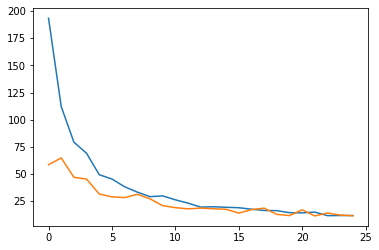

In [30]:
fig, ax = plt.subplots()

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

printing the sizes of all features...we can observe that there is imbalance between features count

In [61]:
train_df['head_lamp'].sum()

185

In [38]:
train_df['tail_lamp'].sum()

110

In [39]:
train_df['glass_shatter'].sum()

132

In [40]:
train_df['scratch'].sum()

259

In [41]:
train_df['dent'].sum()

283

In [42]:
train_df['unknown'].sum()

185

In [43]:
train_df.columns

Index(['image', 'class', 'extent_of_damage', 'subset', 'class_list', 'id',
       'head_lamp', 'tail_lamp', 'glass_shatter', 'scratch', 'dent',
       'unknown'],
      dtype='object')

In [44]:
train_df_hl = train_df[['image', 'head_lamp']]
train_df_hl.head()

,image,head_lamp
0,image/0.jpeg,1
1,image/1.jpeg,1
2,image/2.jpeg,0
3,image/3.jpeg,1
4,image/4.jpeg,0


In [45]:
import pandas as pd
import numpy as np

COLUMN_NAMES = ['image_id','head_lamp','tail_lamp','glass_shatter','scratch','dent','unknown' ]

test_df = pd.DataFrame(columns=COLUMN_NAMES)



for i in np.arange(801, 1101):
      test_df = test_df.append(pd.DataFrame({'image_id': i}, index=[1]), ignore_index=True)


test_df['image_id'] = test_df['image_id'].astype(str) + '.jpeg'

test_df

,image_id,head_lamp,tail_lamp,glass_shatter,scratch,dent,unknown
0,801.jpeg,NaN,NaN,NaN,NaN,NaN,NaN
1,802.jpeg,NaN,NaN,NaN,NaN,NaN,NaN
2,803.jpeg,NaN,NaN,NaN,NaN,NaN,NaN
3,804.jpeg,NaN,NaN,NaN,NaN,NaN,NaN
4,805.jpeg,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
295,1096.jpeg,NaN,NaN,NaN,NaN,NaN,NaN
296,1097.jpeg,NaN,NaN,NaN,NaN,NaN,NaN
297,1098.jpeg,NaN,NaN,NaN,NaN,NaN,NaN
298,1099.jpeg,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
import os
import cv2

test_data =[]
test_data_path = "/content/drive/MyDrive/Test/Test"


for i in range(len(os.listdir(test_data_path))-1):
  path=os.path.join(test_data_path,test_df['image_id'][i])
  img=cv2.imread(path)
  test_data.append(img)

test_data_array = np.array(test_data)



In [47]:
y_test = model.predict(test_data_array)
len(y_test[5])



300

In [48]:
list0 = y_test[0]
list1 = y_test[1]
list2 = y_test[2]
list3 = y_test[3]
list4 = y_test[4]
list5 = y_test[5]

In [49]:
for i in range(300):
  test_df['head_lamp'].iloc[i] = int(np.rint(list0[i]))
  test_df['tail_lamp'].iloc[i] = int(np.rint(list1[i]))
  test_df['glass_shatter'].iloc[i] = int(np.rint(list2[i]))
  test_df['scratch'].iloc[i] = int(np.rint(list3[i]))
  test_df['dent'].iloc[i] = int(np.rint(list4[i]))
  test_df['unknown'].iloc[i] = int(np.rint(list5[i]))

In [50]:
test_df

,image_id,head_lamp,tail_lamp,glass_shatter,scratch,dent,unknown
0,801.jpeg,0,1,0,0,0,0
1,802.jpeg,0,0,0,1,1,0
2,803.jpeg,0,0,0,0,0,1
3,804.jpeg,0,0,0,0,1,0
4,805.jpeg,0,0,0,0,1,0
...,...,...,...,...,...,...,...
295,1096.jpeg,0,0,1,0,1,0
296,1097.jpeg,0,0,1,0,0,0
297,1098.jpeg,1,0,0,1,1,0
298,1099.jpeg,0,0,0,0,1,0


In [51]:
result_df = pd.DataFrame(test_df,columns=['head_lamp','tail_lamp','glass_shatter','scratch','dent','unknown'])
result_df['image'] = 'image/'+test_df['image_id'].astype(str)

cols = ['image', 'dent', 'glass_shatter', 'head_lamp', 'scratch', 'tail_lamp', 'unknown']
result_df = result_df[cols]

result_df

,image,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,image/801.jpeg,0,0,0,0,1,0
1,image/802.jpeg,1,0,0,1,0,0
2,image/803.jpeg,0,0,0,0,0,1
3,image/804.jpeg,1,0,0,0,0,0
4,image/805.jpeg,1,0,0,0,0,0
...,...,...,...,...,...,...,...
295,image/1096.jpeg,1,1,0,0,0,0
296,image/1097.jpeg,0,1,0,0,0,0
297,image/1098.jpeg,1,0,1,1,0,0
298,image/1099.jpeg,1,0,0,0,0,0


In [52]:
result_df.to_csv('submission.csv', index=False)

In [53]:
model.save('model.h5')

In [54]:
test_df['sum' ] = test_df['head_lamp'] + test_df['tail_lamp'] + test_df['scratch']+test_df['dent']+test_df['unknown']+test_df['glass_shatter']

In [55]:
test_df['sum'].value_counts()

1    148
2     79
0     37
3     31
4      4
5      1
Name: sum, dtype: int64